**CraxLab.net | CxL | Department of Civil Engineering | Sakarya University**

---

## Example: Mander Material model of concrete according to TSCB-2019
![](./figures_files/Ex_ConcreteModel1.png)
![](./figures_files/Ex_ConcreteModel.png)

In [1]:
import numpy as np
from numpy import pi as π
from numpy import sqrt as sqrt
import matplotlib.pyplot as mplot

In [2]:
#%% FUNCTIONS
#=====================================================================
" Compressive Behavior of Concrete "
# Unconfined
def ManderUnconfined(fcuno,Ec):
    εcuno = 0.0020    # Strain at max. fcuno
    εcunu = 0.0035    # Strain at ultimate fcunu
    εcunm = 0.0050    # Maximum strain; Kullanmadık!..
    εcun = np.arange(0,εcunm+0.0001,0.0001)
    Esecun = fcuno/εcuno
    run = Ec/(Ec-Esecun)
    
    σcun = []
    for εcuni in εcun:
        if εcuni <= εcunu:
            xun = εcuni/εcuno 
            σcuni = fcuno*xun*run/(run-1+xun**run)
        else:
            xunu = εcunu/εcuno  
            fcunu = fcuno*xunu*run/(run-1+xunu**run)
            σcuni = fcunu - fcunu*(εcuni-εcunu)/(εcunm-εcunu)        
        σcun.append(σcuni)
    
    fcunm = σcun[-1]
    return (εcun,σcun,εcuno,fcuno,εcunm,fcunm)

#---------------------------------------
# Confined
def ManderConfined(bo,b1,ho,h1,nsx,nsy,As,s,φw,nwx,nwy,fsyw,fcuno,Ec):
    εcuno = 0.0020      # Strain at max. fcuno for unconfined concrete
    Tai2 = 2 * (b1**2/(nsx-1) + h1**2/(nsy-1))    # Tai2, Sum of square of the distances between long. bars
    ke = (1-Tai2/(6*bo*ho))*(1-s/(2*bo))*(1-s/(2*ho))*(1-As/(bo*ho))**(-1)
    ρx = (np.pi*φw**2/4)*nwx/(bo*s)   # Transverse steel reinforcing ratio in X dir.
    ρy = (np.pi*φw**2/4)*nwy/(ho*s)   # Transverse steel reinforcing ratio in Y dir.
    fex = ke*ρx*fsyw
    fey = ke*ρy*fsyw
    fe = (fex+fey)/2
    λc = 2.254*np.sqrt(1+7.94*fe/fcuno)-2*fe/fcuno-1.254
    fcco = λc*fcuno                   # fcc ; Max. compressive stress of concrete
    εcco = εcuno*(1+5*(λc-1))         # εcc ; concrete strain corresponding to max. compressive stress of concrete
    Esec = fcco/εcco
    r = Ec/(Ec-Esec)
    
    # Ultimate strain calculations
    αse = (1-Tai2/(6*bo*ho))*(1-s/(2*bo))*(1-s/(2*ho))
    ωwe = αse*min(ρx,ρy)*fsyw/fcuno
    εccui = 0.0035+0.04*np.sqrt(ωwe)
    if εccui<=0.018:
        εccu = εccui
    else: εccu = 0.018    
    
    εcc = np.arange(0,εccu+0.0001,0.0001)    
    σcc = []
    for εcci in εcc:
        x = εcci/εcco
        σcci=fcco*x*r/(r-1+x**r)
        σcc.append(σcci)

    fccu = σcc[-1]   
    return (εcc,σcc,εcco,fcco,εccu,fccu)

In [3]:
# INPUT DATA
#         (top) b (--> X dir.)
#        ---------------
#        | o    o    o |
#        |      |      |
#        | o----|----o | 
#        |      |      | h (Y dir.)
# (left) | o----|----o | (right)
#        |      |      |
#        | o    o    o |
#        ---------------
#           (bottom)

In [4]:
#%% INPUT SECTION PROPERTIES
print("Sectional Analysis for RC columns according to Turkish Seismic Code for Buildings (TSCB-2019)")
print("All UNITS in Newton, mm, MPa  \n")

# Section Properties
b  = 250.0		# [mm], Section's Dimension on 'X' direction 
h  = 500.0		# [mm], Section's Dimension on 'Y' direction (larger Dim)
cc = 25.0		# [mm], Net concrete cover from the outer edge of stirrups

# Longitudinal Bars
φs  = 16.0 		# [mm], diameter of longitudinal bars
nsx = 3 		# number of longitudinal bars in X direction in one row
nsy = 3 		# number of longitudinal bars in Y direction in one row
fsy = 420.0		# [MPa], Yield Tensile Strength of longitudinal steel
fsu = 550.0     # [MPa], Ultimate Tensile Strength of longitudinal steel
Es  = 200000.0		# [MPa], Elastic modulus of longitudinal steel
εsh = 0.008		# Strain hardening of longitudinal steel
εsu = 0.08		# Ultimate strain of longitudinal steel

# Stirrups
φw   = 8.0		# [mm], Diameter of stirrups
s    = 100.0	# [mm], Stirrup spacing (distance between Stirrups)
nwx  = 2 		# number of stirrups by taking a ‘cut’ across the section in the ‘X direction’
nwy  = 2 		# number of stirrups by taking a ‘cut’ across the section in the ‘Y direction’
fsyw = 420.0	# [MPa], Tensile Strength of transverse steel (stirrups)
Esw  = 200000.0	# [MPa], Elastic modulus of transverse steel (stirrups)
εsuw = 0.08		# Ultimate strain of transverse steel (stirrups)

# Concrete
fcuno = 25.0    # [MPa], Compressive Strength of Unconfined Concrete (cylinder specimen)
Ec    = 5000.0*sqrt(fcuno)  # [MPa], Modulus of elasticity of concrete

####### Analysis 
#### Y doğrultusunda çözüyoruz.###
"Sectional Properties"
cs = cc+φw+φs/2          # Concrete cover from the center of long. bars
cw = cc+φw/2             # Concrete cover from the center of stirrups
bo = b-2*cw              # Section width between the center of stirrups
ho = h-2*cw              # Section height between the center of stirrups
b1 = b-2*cs              # Section width between the long. bars
h1 = h-2*cs              # Section height between the long. bars
ns = 2*nsx + 2*(nsy-2)   # Number of long. bars
print("# of long. bars:",ns)
As = (π*φs**2/4)*ns      # Total area of long. bars

Sectional Analysis for RC columns according to Turkish Seismic Code for Buildings (TSCB-2019)
All UNITS in Newton, mm, MPa  

# of long. bars: 8


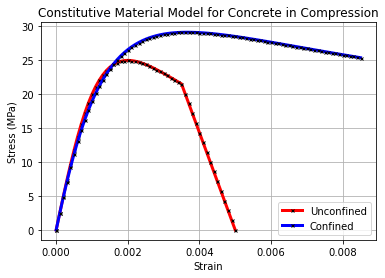

In [6]:
#%% GENERAL SOLUTIONS
" Mander Unconfined and Confined Concrete Compressive Constitutive Material Model"
# Unconfined Concrete
εcun,σcun,εcuno,fcuno,εcunm,fcunm = ManderUnconfined(fcuno,Ec)
# confined Concrete
εcc,σcc,εcco,fcco,εccu,fccu = ManderConfined(bo,b1,ho,h1,nsx,nsy,As,s,φw,nwx,nwy,fsyw,fcuno,Ec)

# Plot the curves
fig, grfk = mplot.subplots()  
grfk.plot(εcun,σcun, color="r",label='Unconfined',linewidth=3,marker='x',markersize=3,markerfacecolor="k",markeredgecolor="k")
grfk.plot(εcc, σcc,  color="b",label='Confined', linewidth=3,marker='x',markersize=3,markerfacecolor="k",markeredgecolor="k")
grfk.set(xlabel="Strain", ylabel="Stress (MPa)", title="Constitutive Material Model for Concrete in Compression")
grfk.grid(); grfk.legend(loc="best"); mplot.show()